In [82]:
import numpy as np
import matplotlib.pyplot as plt

In [125]:
def find_range(contents):
    string_find = '"No."\t"Pe/kPa"\t"P0/kPa"\t"Vd/ml"\t"V/ml(STP) g-1"\t\n'
    start_adsorption, start_desorption = [i for i,x in enumerate(contents) if x==string_find]
    string_find = '0\t0\t0\t0\t0\t\n'
    end_adsorption, end_desorption = [i for i,x in enumerate(contents) if x==string_find]
    
    return (start_adsorption, end_adsorption, start_desorption, end_desorption)

In [126]:
def read_branch(filename, branch):
    #Finds the start and end of branches
    with open(filename, encoding='shift-jis') as fp:
        contents = fp.readlines()
        start_adsorption, end_adsorption, start_desorption, end_desorption = find_range(contents)
    
    if branch == 'adsorption':
        skip_header = start_adsorption+1
        max_rows = end_adsorption-start_adsorption-1
    elif branch == 'desorption':
        skip_header = start_desorption+1
        max_rows = end_desorption-start_desorption-1
    
    isotherm = np.genfromtxt(filename,
                             delimiter='\t',
                             skip_header=skip_header,
                             max_rows=max_rows,
                             encoding='shift-jis',
                             usecols=(1,2,4))
    return np.column_stack((isotherm[:,0]/isotherm[:,1], isotherm[:,2]))

In [127]:
def plot_isotherm(filename):
    fig, ax = plt.subplots(dpi=100)
    ax.plot(read_branch(filename, 'adsorption')[:,0],
            read_branch(filename, 'adsorption')[:,1],
            label='Adsorption', marker='o')
    ax.plot(read_branch(filename, 'desorption')[:,0],
            read_branch(filename, 'desorption')[:,1],
            label='Desorption', marker='o')
    ax.set_title(filename)
    ax.set_xscale('log')
    ax.legend()
    plt.close()
    return fig

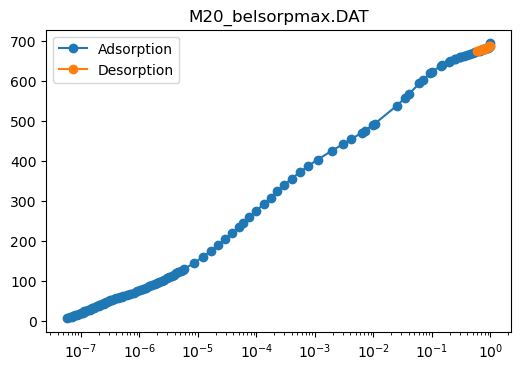

In [130]:
filename = 'M20_belsorpmax.DAT'
#filename = 'TAIKO_belsorpmaxII.DAT'
plot_isotherm(filename)